In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'NonStdPort',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding',
       'StatusBarCust', 'DisableRightClick', 'IframeRedirection',
       'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class'],
      dtype='object')

In [33]:
df.dtypes

Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [28]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (11054, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64


In [ ]:
df.describe()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.913877,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.406009,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Class distribution:
class
 1    6157
-1    4897
Name: count, dtype: int64


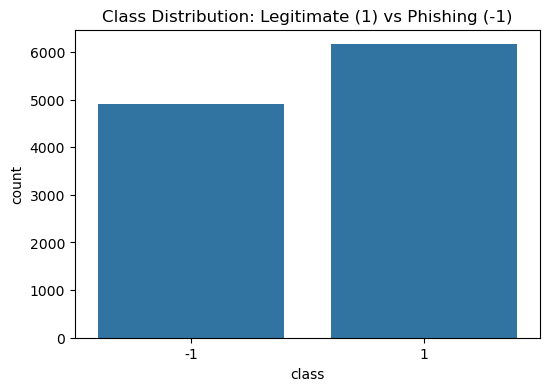

In [9]:
print("\nClass distribution:")
print(df['class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution: Legitimate (1) vs Phishing (-1)')
plt.show()

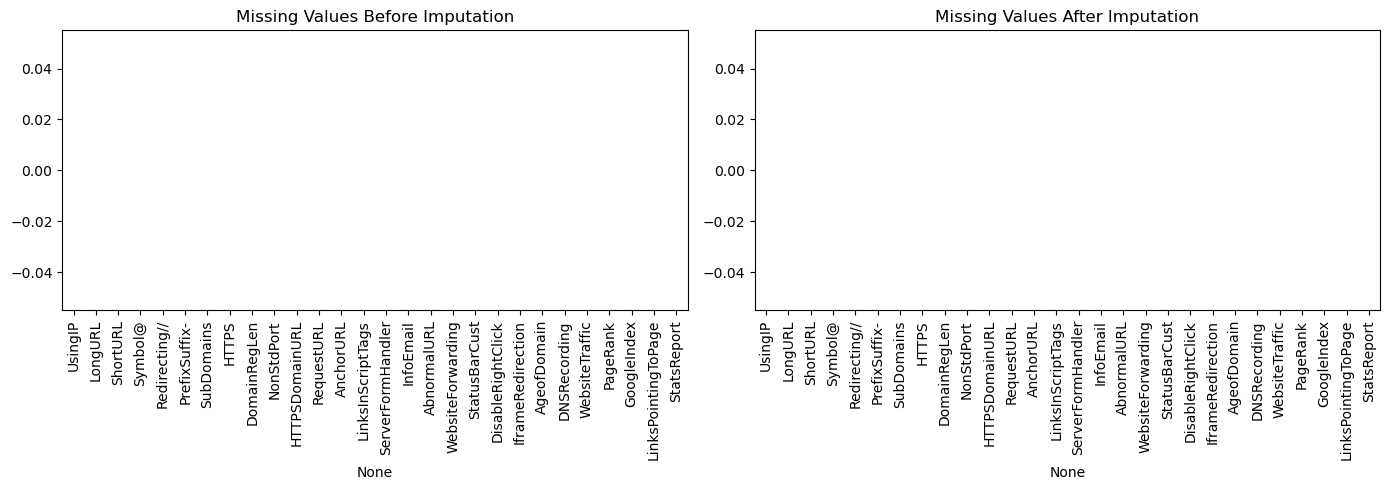

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

# Count missing values before imputation
missing_before = X.isnull().sum()

# Impute missing values (returns NumPy array)
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

# Count missing values after imputation
missing_after = X_imputed.isnull().sum()

# Plot missing values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=missing_before.index, y=missing_before.values, color='skyblue')
plt.title("Missing Values Before Imputation")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=missing_after.index, y=missing_after.values, color='lightgreen')
plt.title("Missing Values After Imputation")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


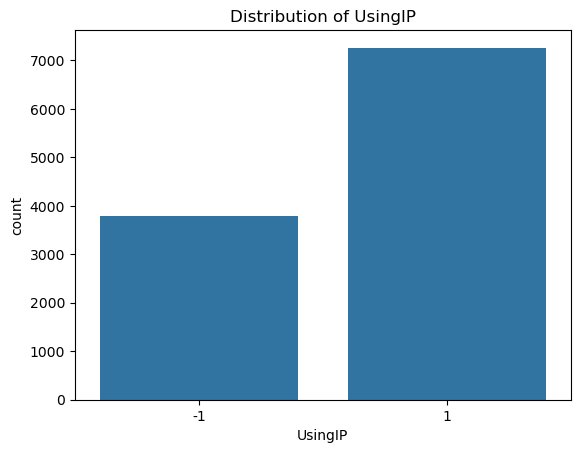

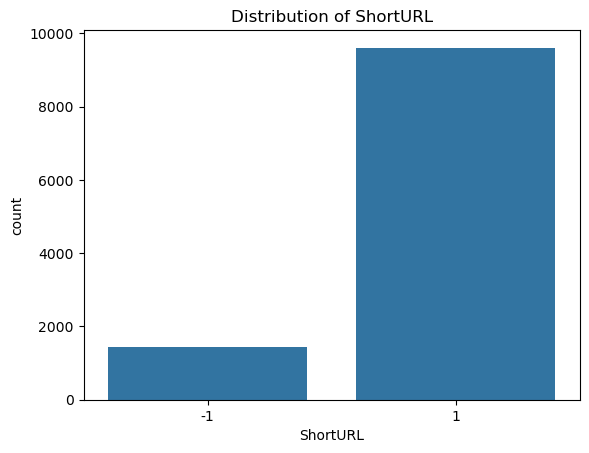

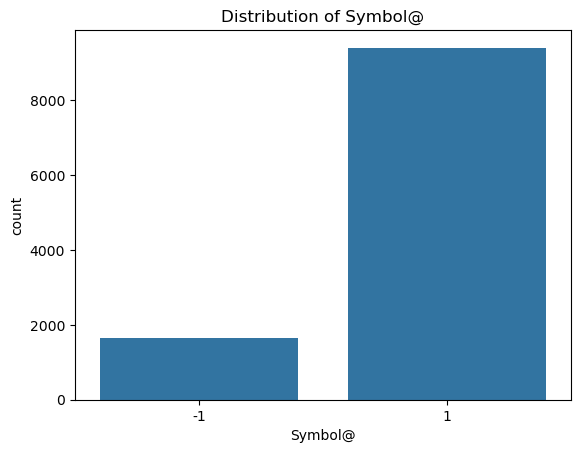

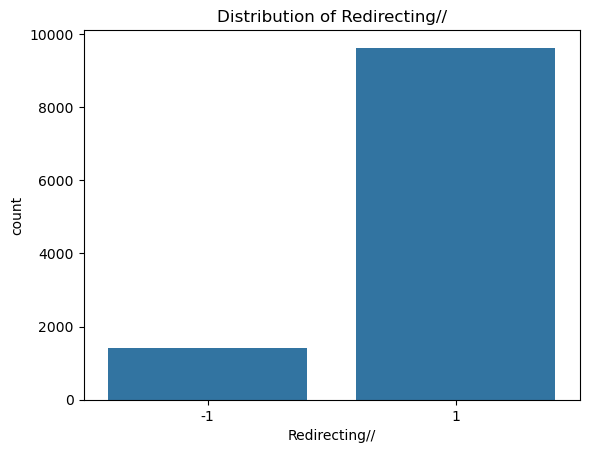

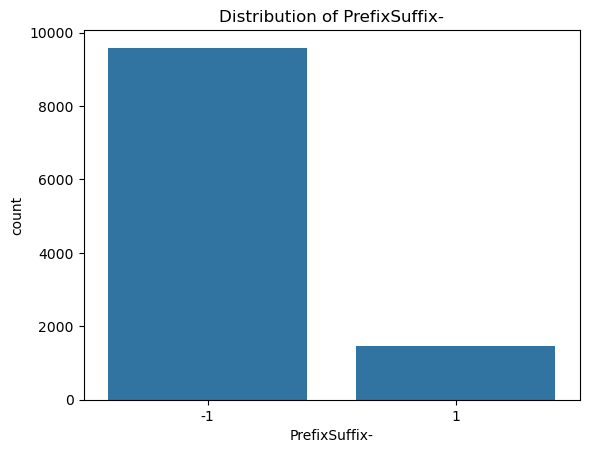

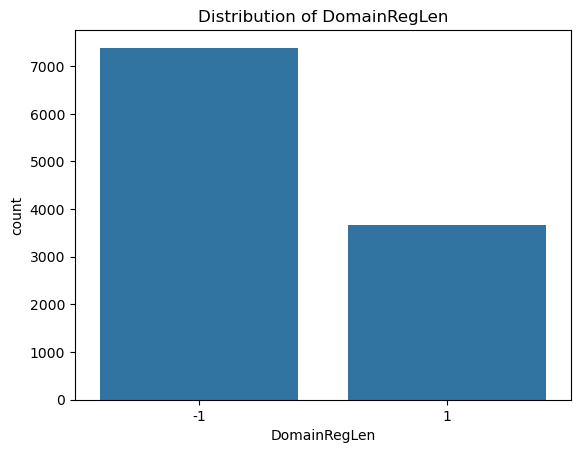

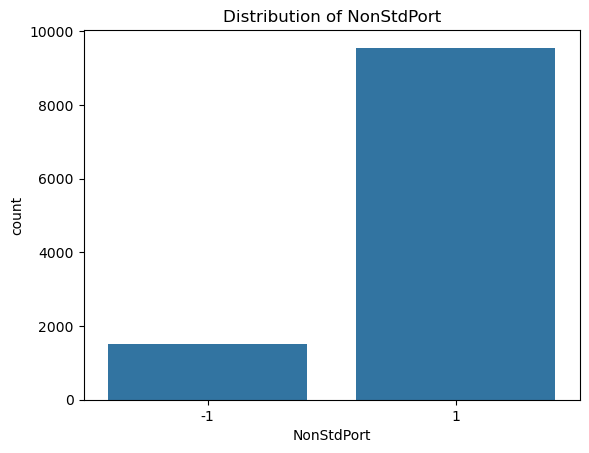

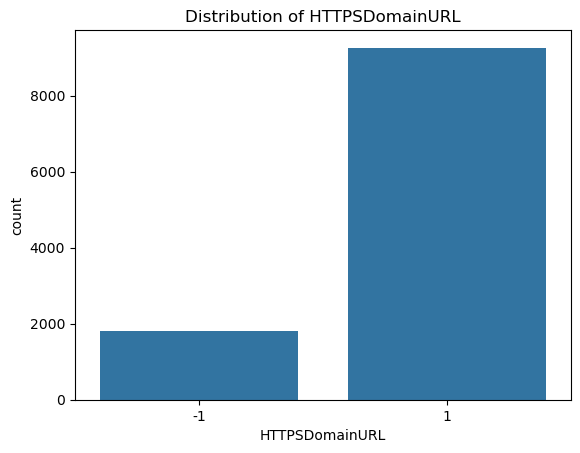

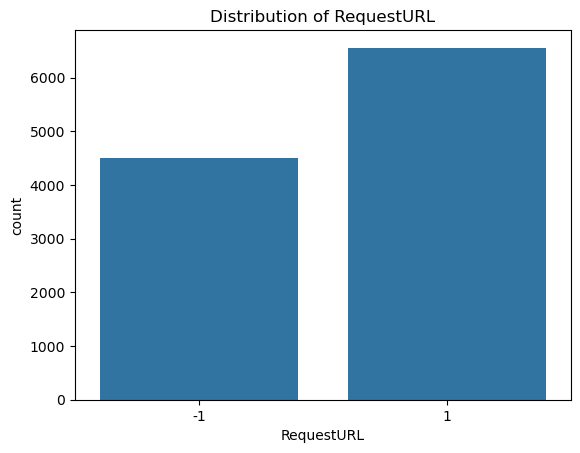

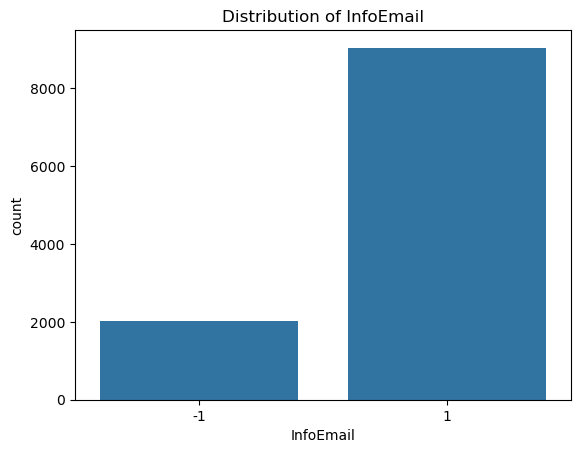

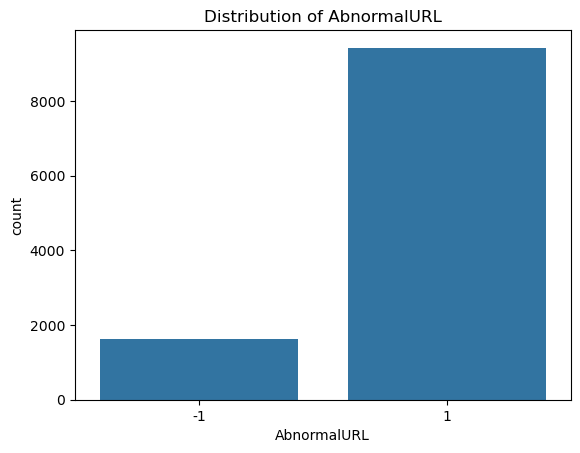

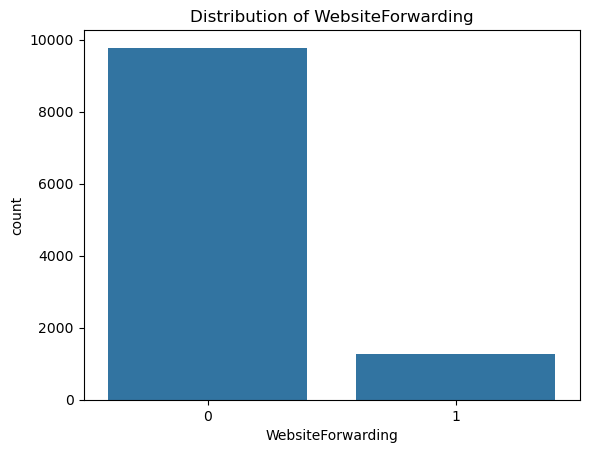

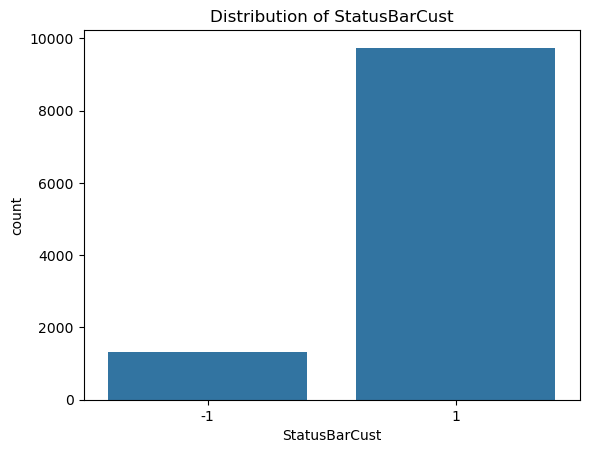

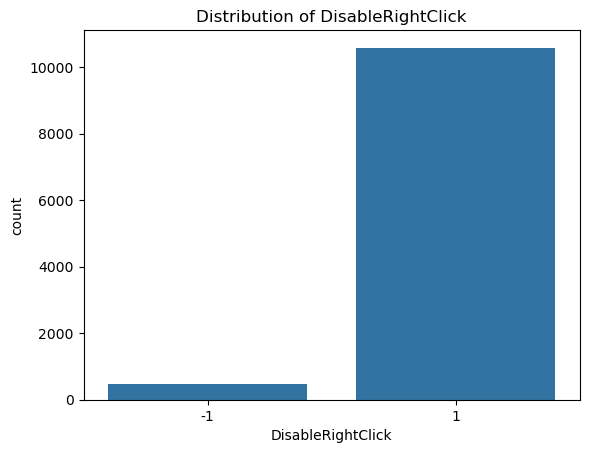

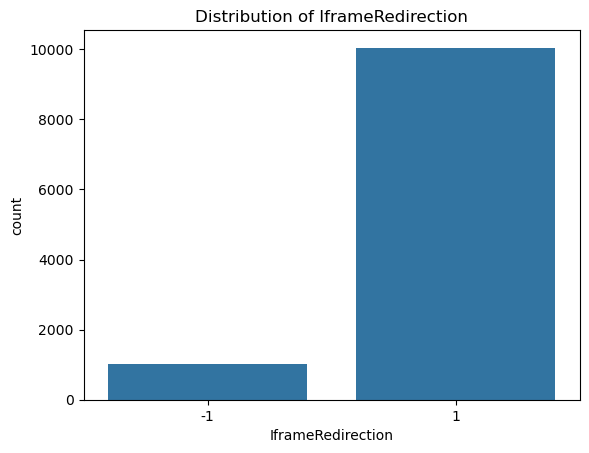

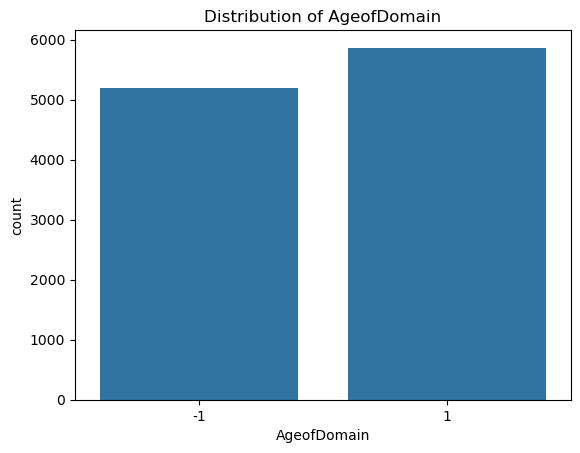

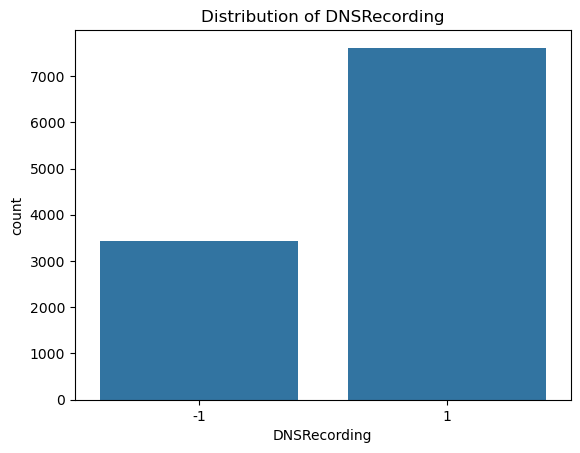

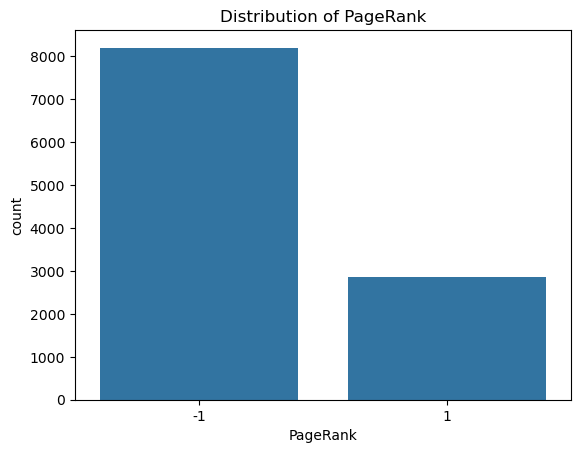

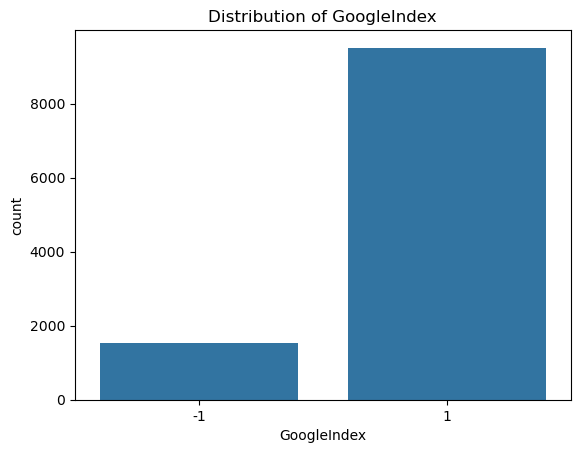

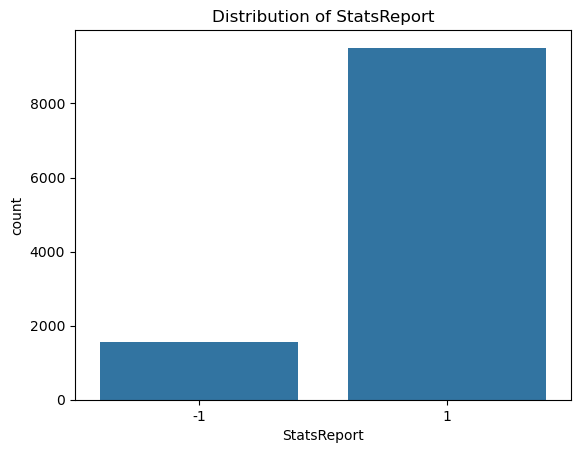

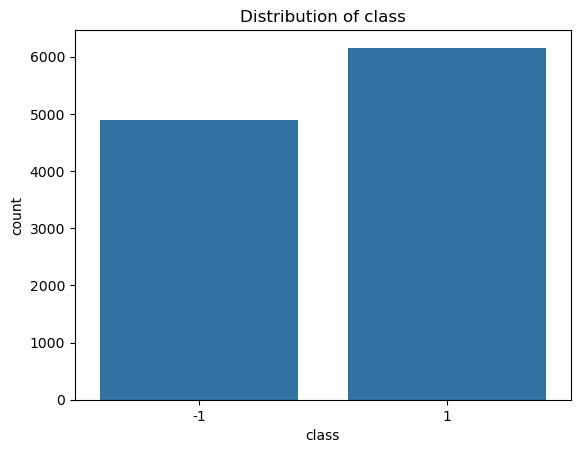

In [31]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


In [12]:
# Step 4: Check feature distribution (percentage of 1s)
feature_cols = df.columns.drop('class')
feature_summary = df[feature_cols].mean().sort_values(ascending=False)
print("\nFeature presence rate (percentage of '1's):")
print(feature_summary)


Feature presence rate (percentage of '1's):
Index                  5526.500000
DisableRightClick         0.913877
IframeRedirection         0.816899
StatusBarCust             0.762077
Redirecting//             0.741632
ShortURL                  0.738737
NonStdPort                0.728243
GoogleIndex               0.721549
StatsReport               0.719739
AbnormalURL               0.705446
Symbol@                   0.700561
HTTPSDomainURL            0.675231
InfoEmail                 0.635788
Favicon                   0.628551
UsingPopupWindow          0.613353
DNSRecording              0.377239
LinksPointingToPage       0.343948
UsingIP                   0.313914
WebsiteTraffic            0.287407
HTTPS                     0.251040
RequestURL                0.186720
WebsiteForwarding         0.115705
SubDomains                0.064049
AgeofDomain               0.061335
AnchorURL                -0.076443
LinksInScriptTags        -0.118238
DomainRegLen             -0.336711
PageRank  

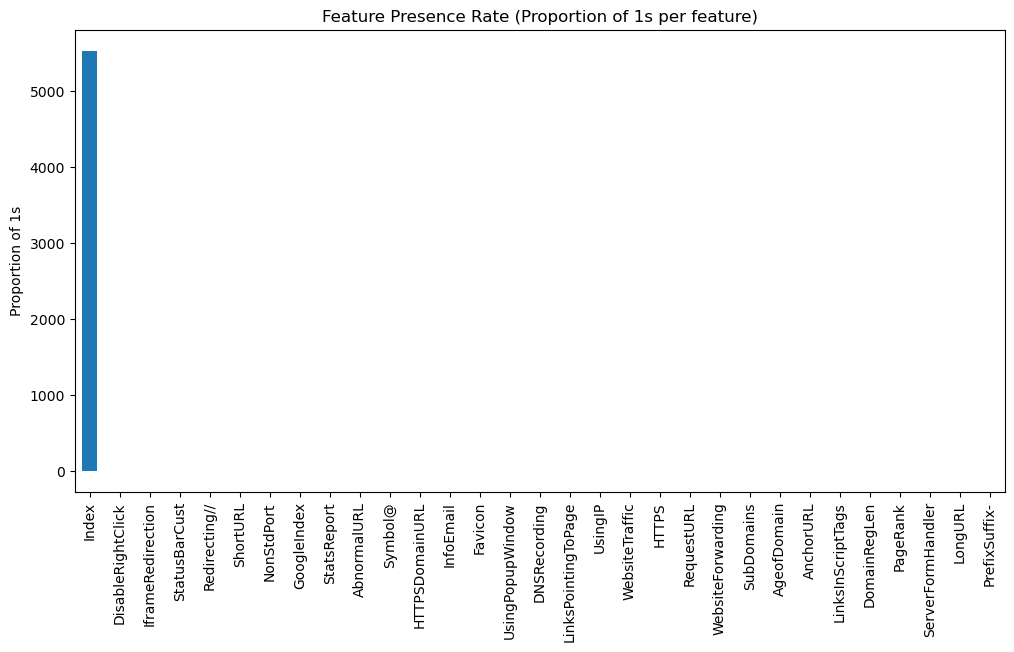

In [13]:
# Plot feature presence rate
plt.figure(figsize=(12,6))
feature_summary.plot(kind='bar')
plt.title('Feature Presence Rate (Proportion of 1s per feature)')
plt.ylabel('Proportion of 1s')
plt.show()

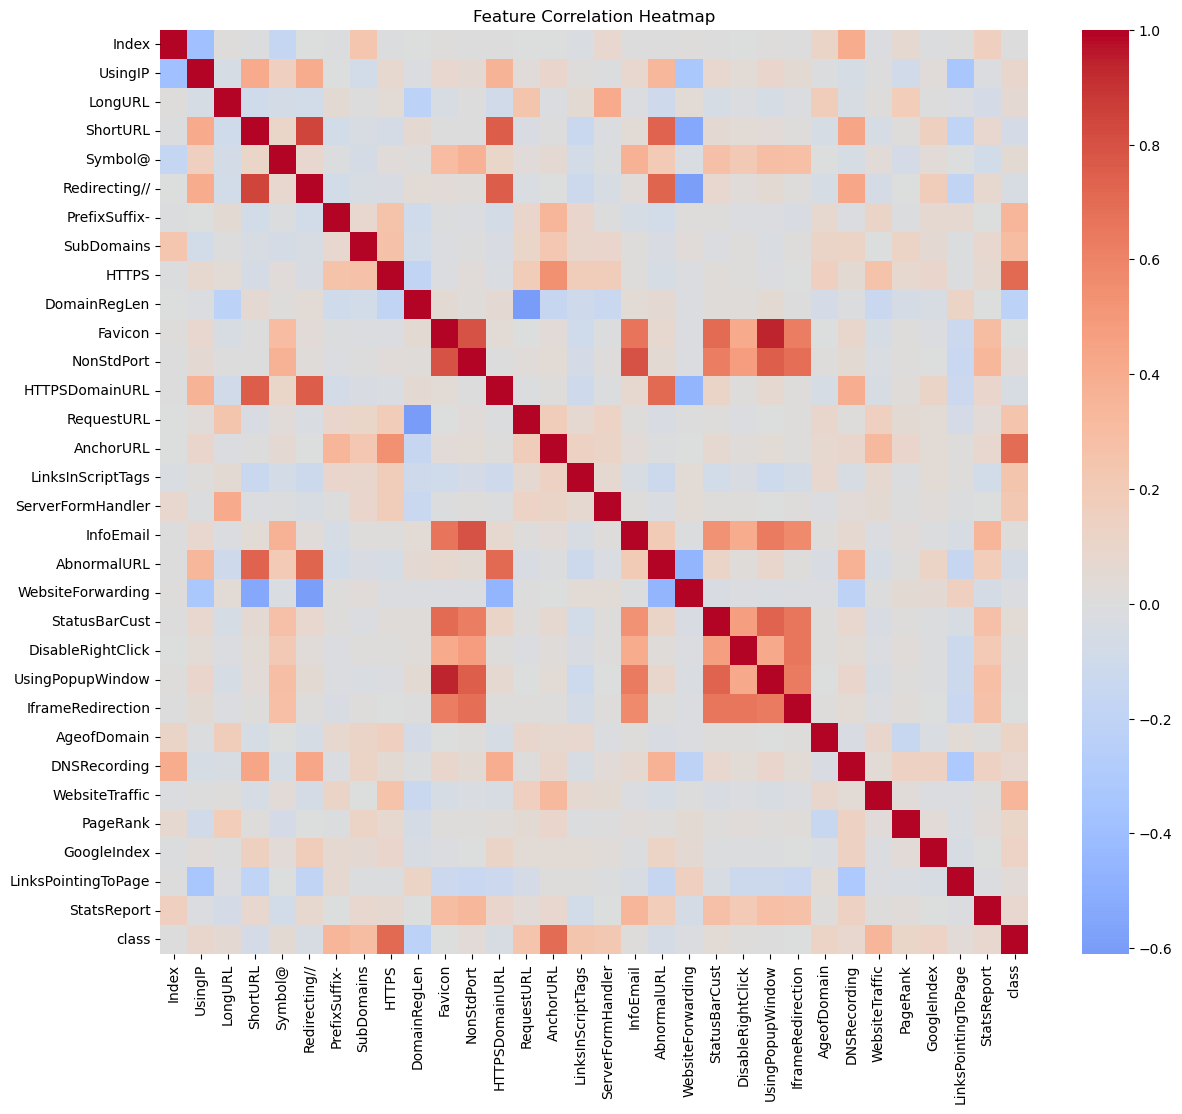

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [43]:

features_to_remove = [
    'Index',               # Just a row ID
    'AgeofDomain',         # May be missing or unreliable
    'DisableRightClick',   # Many legitimate sites also disable right-click
    'IframeRedirection',   # Used on both phishing and legit sites
    'StatusBarCust',       # Many legit sites customize the status bar
    'StatsReport',         # May contain outdated or irrelevant stats
    'NonStdPort',          # Rarely used and may not be useful
    'WebsiteForwarding',   # Unreliable for classification
    'InfoEmail' ,           # Just the presence of email, weak signal
    'class'
]
# Drop only the columns that exist
df = df.drop(columns=[col for col in features_to_remove if col in df.columns])


In [ ]:
# Separate features and target
X - df
y = df['class']

# Optional: remove outliers using Isolation Forest (contamination=0.01)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso.fit_predict(X)
mask_inliers = outlier_flags == 1
X, y = X.loc[mask_inliers], y.loc[mask_inliers]  # Use .loc for label-based filtering

KeyError: "['Index', 'AgeofDomain', 'DisableRightClick', 'IframeRedirection', 'StatusBarCust', 'StatsReport', 'NonStdPort', 'WebsiteForwarding', 'InfoEmail', 'class'] not found in axis"

In [23]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9689497716894977

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.96       967
           1       0.97      0.98      0.97      1223

    accuracy                           0.97      2190
   macro avg       0.97      0.97      0.97      2190
weighted avg       0.97      0.97      0.97      2190



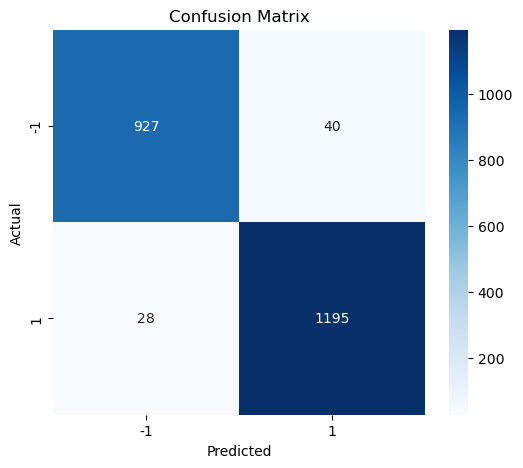

In [24]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

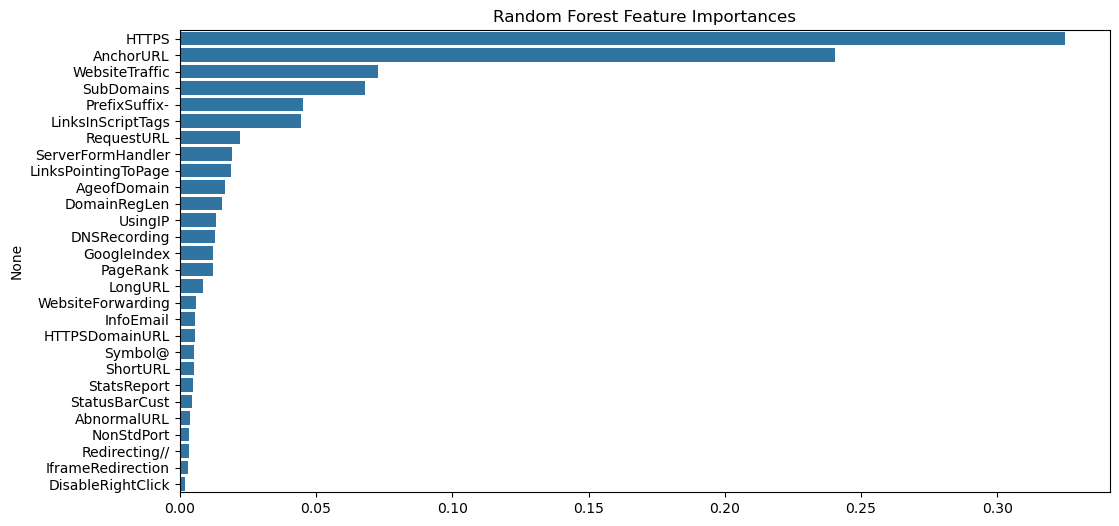

In [25]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Random Forest Feature Importances')
plt.show()
